In [1]:
import json
import pandas as pd
from pathlib import Path

paths = [
    Path("../../analysis/mouse_m01_d2/results/vgg19_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/vgg19_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/vgg19_neural_pc1_m03_d4.json")
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 75 rows from 3 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,vgg19_neural_pc1,m01_d2,conv2_2,NaN,0.407,0.431,1.396,1.423,0.152,NaN
1,vgg19_neural_pc1,m01_d2,conv2_2,10.0,0.342,0.362,1.396,1.423,0.172,-0.099
2,vgg19_neural_pc1,m01_d2,conv2_2,20.0,0.367,0.389,1.396,1.423,0.169,-0.094
3,vgg19_neural_pc1,m01_d2,conv2_2,50.0,0.404,0.427,1.396,1.423,0.167,-0.087
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091
...,...,...,...,...,...,...,...,...,...,...
70,vgg19_neural_pc1,m03_d4,fc2,NaN,0.208,0.221,1.588,1.580,0.034,NaN
71,vgg19_neural_pc1,m03_d4,fc2,10.0,0.168,0.179,1.588,1.580,0.027,0.478
72,vgg19_neural_pc1,m03_d4,fc2,20.0,0.183,0.195,1.588,1.580,0.030,0.482
73,vgg19_neural_pc1,m03_d4,fc2,50.0,0.197,0.210,1.588,1.580,0.031,0.461


In [2]:
# Filter to only rows where n_pcs == 100
df_100pcs = df[df["n_pcs"] == 100]
df_100pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091
9,vgg19_neural_pc1,m01_d2,conv3_4,100.0,0.407,0.430,1.515,1.462,0.202,-0.056
14,vgg19_neural_pc1,m01_d2,conv4_4,100.0,0.394,0.417,1.616,1.645,0.169,0.000
19,vgg19_neural_pc1,m01_d2,conv5_4,100.0,0.279,0.296,1.867,1.698,0.125,0.252
24,vgg19_neural_pc1,m01_d2,fc2,100.0,0.263,0.280,1.583,1.589,0.107,0.447
29,vgg19_neural_pc1,m02_d3,conv2_2,100.0,0.447,0.488,1.394,1.418,0.128,-0.091
34,vgg19_neural_pc1,m02_d3,conv3_4,100.0,0.430,0.469,1.524,1.542,0.167,-0.056
39,vgg19_neural_pc1,m02_d3,conv4_4,100.0,0.391,0.427,1.627,1.664,0.135,0.000
44,vgg19_neural_pc1,m02_d3,conv5_4,100.0,0.300,0.328,1.677,1.709,0.072,0.252
49,vgg19_neural_pc1,m02_d3,fc2,100.0,0.303,0.332,1.593,1.602,0.071,0.447


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_100pcs.groupby("layer").mean(numeric_only=True).reset_index()
avg_metrics

,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,conv2_2,100.0,0.390333,0.418333,1.395667,1.421333,0.116667,-0.091
1,conv3_4,100.0,0.378333,0.404667,1.517667,1.513000,0.139000,-0.056
2,conv4_4,100.0,0.352333,0.377667,1.624000,1.653667,0.114000,0.000
3,conv5_4,100.0,0.271000,0.291000,1.791333,1.708667,0.079333,0.252
4,fc2,100.0,0.256667,0.276667,1.588000,1.590333,0.069667,0.447


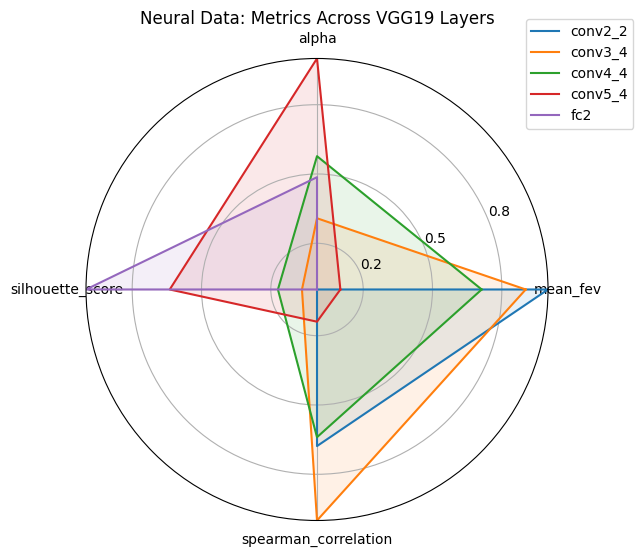

In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Normalise each metric to [0, 1]
metrics = ['mean_fev', 'alpha', 'silhouette_score', 'spearman_correlation']
scaler = MinMaxScaler()
avg_metrics_scaled = avg_metrics.copy()
avg_metrics_scaled[metrics] = scaler.fit_transform(avg_metrics[metrics])

labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in avg_metrics_scaled.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=row['layer'])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.5, 0.8])
ax.set_yticklabels(['0.2', '0.5', '0.8'])
ax.set_ylim(0, 1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Neural Data: Metrics Across VGG19 Layers")
plt.show()